# Classifying red wine quality based on its various characteristics
DSCI 100 101 - Group Project Report - Group 114: Faraz Hosseinian-Tehrani, Yoonha Jeon, Michael Wang, Wenny Xu

## Introduction

#### Question

How accurately can the quality of red wine be predicted from its factors, and which of these factors have the largest impact?

#### Background Information

Red wine has always been popular in social settings, but it is typically expensive as a luxury good, and the price is heavily based on the wine's quality. Product quality certification is a marketing tool used by red wine vendors to justify their pricing. However, the procedure for wine quality is impossible to evaluate objectively because it often only considers the subjective sensory perceptions of human specialists. Moreover, prices differ in ways that are unfair to consumers as a result of the highly variable quality assessment. 

However, laboratory-based physicochemical testing that takes into account chemical properties is a crucial component of wine certification. (Nemzer et al. 2021) If sensory evaluations can be coupled with scientific characterizations, there can be greater control over the quality evaluation procedure and better results capturing the inherent subjectivity.

#### Dataset

* https://archive.ics.uci.edu/ml/datasets/wine+quality

The wine quality dataset we will be using is related to red variants of the Portuguese "Vinho Verde" wine. This dataset contains a total of 12 variables including physicochemical (inputs) and sensory (output) variables, with 1,599 recorded observations. The input variables are based on the chemical component analysis of red wine, including measurements such as acidity, residual sugar, density, pH, alcohol, sulfur dioxide, and chlorides. The quality of the red wine is represented with a score between 0 and 10 based on the sensory output. 

We chose to use 5 predictors: fixed acidity, residual sugar, density, pH, and alcohol. We chose these predictors because they were variables which we thought would have a noticable impact on wine quality, and are also easily understandable unlike some obscure measurements present in the dataset.


## Expected Outcomes

#### What we expect to find

We expect to find an accurate way to predict red wine quality (score between 0 to 10) based on the given parameters: fixed acidity, residual sugar, density, PH, and alcohol.

#### What impact our findings could have

If our process returns accurate results, our model could allow us to make predictions for new observations. This model could be useful in several wine-related industries, and will allow retailers to choose a more desirable selection of wines for consumers, along with helping producers, distributors, and businesses in the wine industry focus on producing higher quality wines. Furthermore, this will help sellers better evaluate their production, distribution, and pricing strategies, as well as giving consumers a fairer market for wine.

#### Future questions our findings could lead to

* How could the accuracy of red wine quality evaluation be improved? 
* What other characteristics of red wine greatly affect its percieved quality? 
* Are white wines evaluated with the same indicators as red wines?


## Methods

The quality of a given observation of red wine will be classified with 5 predictors: fixed acidity, residual sugar, density, pH, and alcohol. First, the parameters will be standarized to make values consistent. The relationships between various predictors and the quality of the red wine will be visualized using scatterplots. Then, the k value with the highest accuracy will be calculated. Based on the calculated value, the wine quality will be trained using the chosen parameters so that wine quality can be determined using fixed acidity, residual sugar, density, pH, and alcohol. 


In [1]:
# importing required libraries
install.packages("ggcorrplot")
library(repr)
library(readr)
library(GGally)
library(ggplot2)
library(tidyverse)
library(tidymodels)
library(ggcorrplot)
library(RColorBrewer)

# setting seed
set.seed(1000)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::

#### 1. Reading dataset from the web

In [28]:
# reading data from web to web_data
web_data <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# reading web_data to redwine_data with spaces removed from columns and "quality" set as factor
redwine_data <- read_delim(web_data) |>
    rename(fixed_acidity = `fixed acidity`, 
          volatile_acidity = `volatile acidity`,
          citric_acid = `citric acid`,
          residual_sugar = `residual sugar`,
          free_sulfur_dioxide = `free sulfur dioxide`,
          total_sulfur_dioxide = `total sulfur dioxide`) |>
    mutate(quality = as_factor(quality))

# displaying data
print("Table 1: Original Dataset")
redwine_data

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1: Original Dataset"


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


#### 2. Cleaning and wrangling data into a tidy format, creating splits, and selecting predictors

In [29]:
# creating training and testing sets with a 75% proportion of training data and strata set to quality
redwine_split <- initial_split(redwine_data, prop = .75, strata = quality)
    redwine_train_all <- training(redwine_split)
    redwine_test <- testing(redwine_split)

# selecting our 5 predictors
redwine_train <- redwine_train_all |>
    select(fixed_acidity, residual_sugar, density, pH, alcohol, quality)

print("Table 2: Training Set")
redwine_train

[1] "Table 2: Training Set"


fixed_acidity,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,1.9,0.9978,3.51,9.4,5
7.8,2.6,0.9968,3.20,9.8,5
7.8,2.3,0.9970,3.26,9.8,5
7.4,1.9,0.9978,3.51,9.4,5
7.9,1.6,0.9964,3.30,9.4,5
6.7,1.8,0.9959,3.28,9.2,5
7.5,6.1,0.9978,3.35,10.5,5
7.8,1.6,0.9974,3.26,9.1,5
8.9,3.9,0.9986,3.17,9.2,5


#### 3. Exploratory data analysis - summarizing training data with relevant table

In [30]:
# mapping 'mean' function to every column and displaying result
redwine_train_mean <- map_df(redwine_train, mean)

# displaying means
print("Table 3: Means of Training Set")
redwine_train_mean

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


[1] "Table 3: Means of Training Set"


fixed_acidity,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.343072,2.523915,0.9967217,3.309307,10.44286,NA


Since our data already has an equal amount of observations in each class, we decided to use create a table to show the mean of each column. This will help us understand the average values we are working with, what to expect, and what would be an extreme value or outlier.

#### 4. Exploratory data analysis - visualizing training data with relevant plot

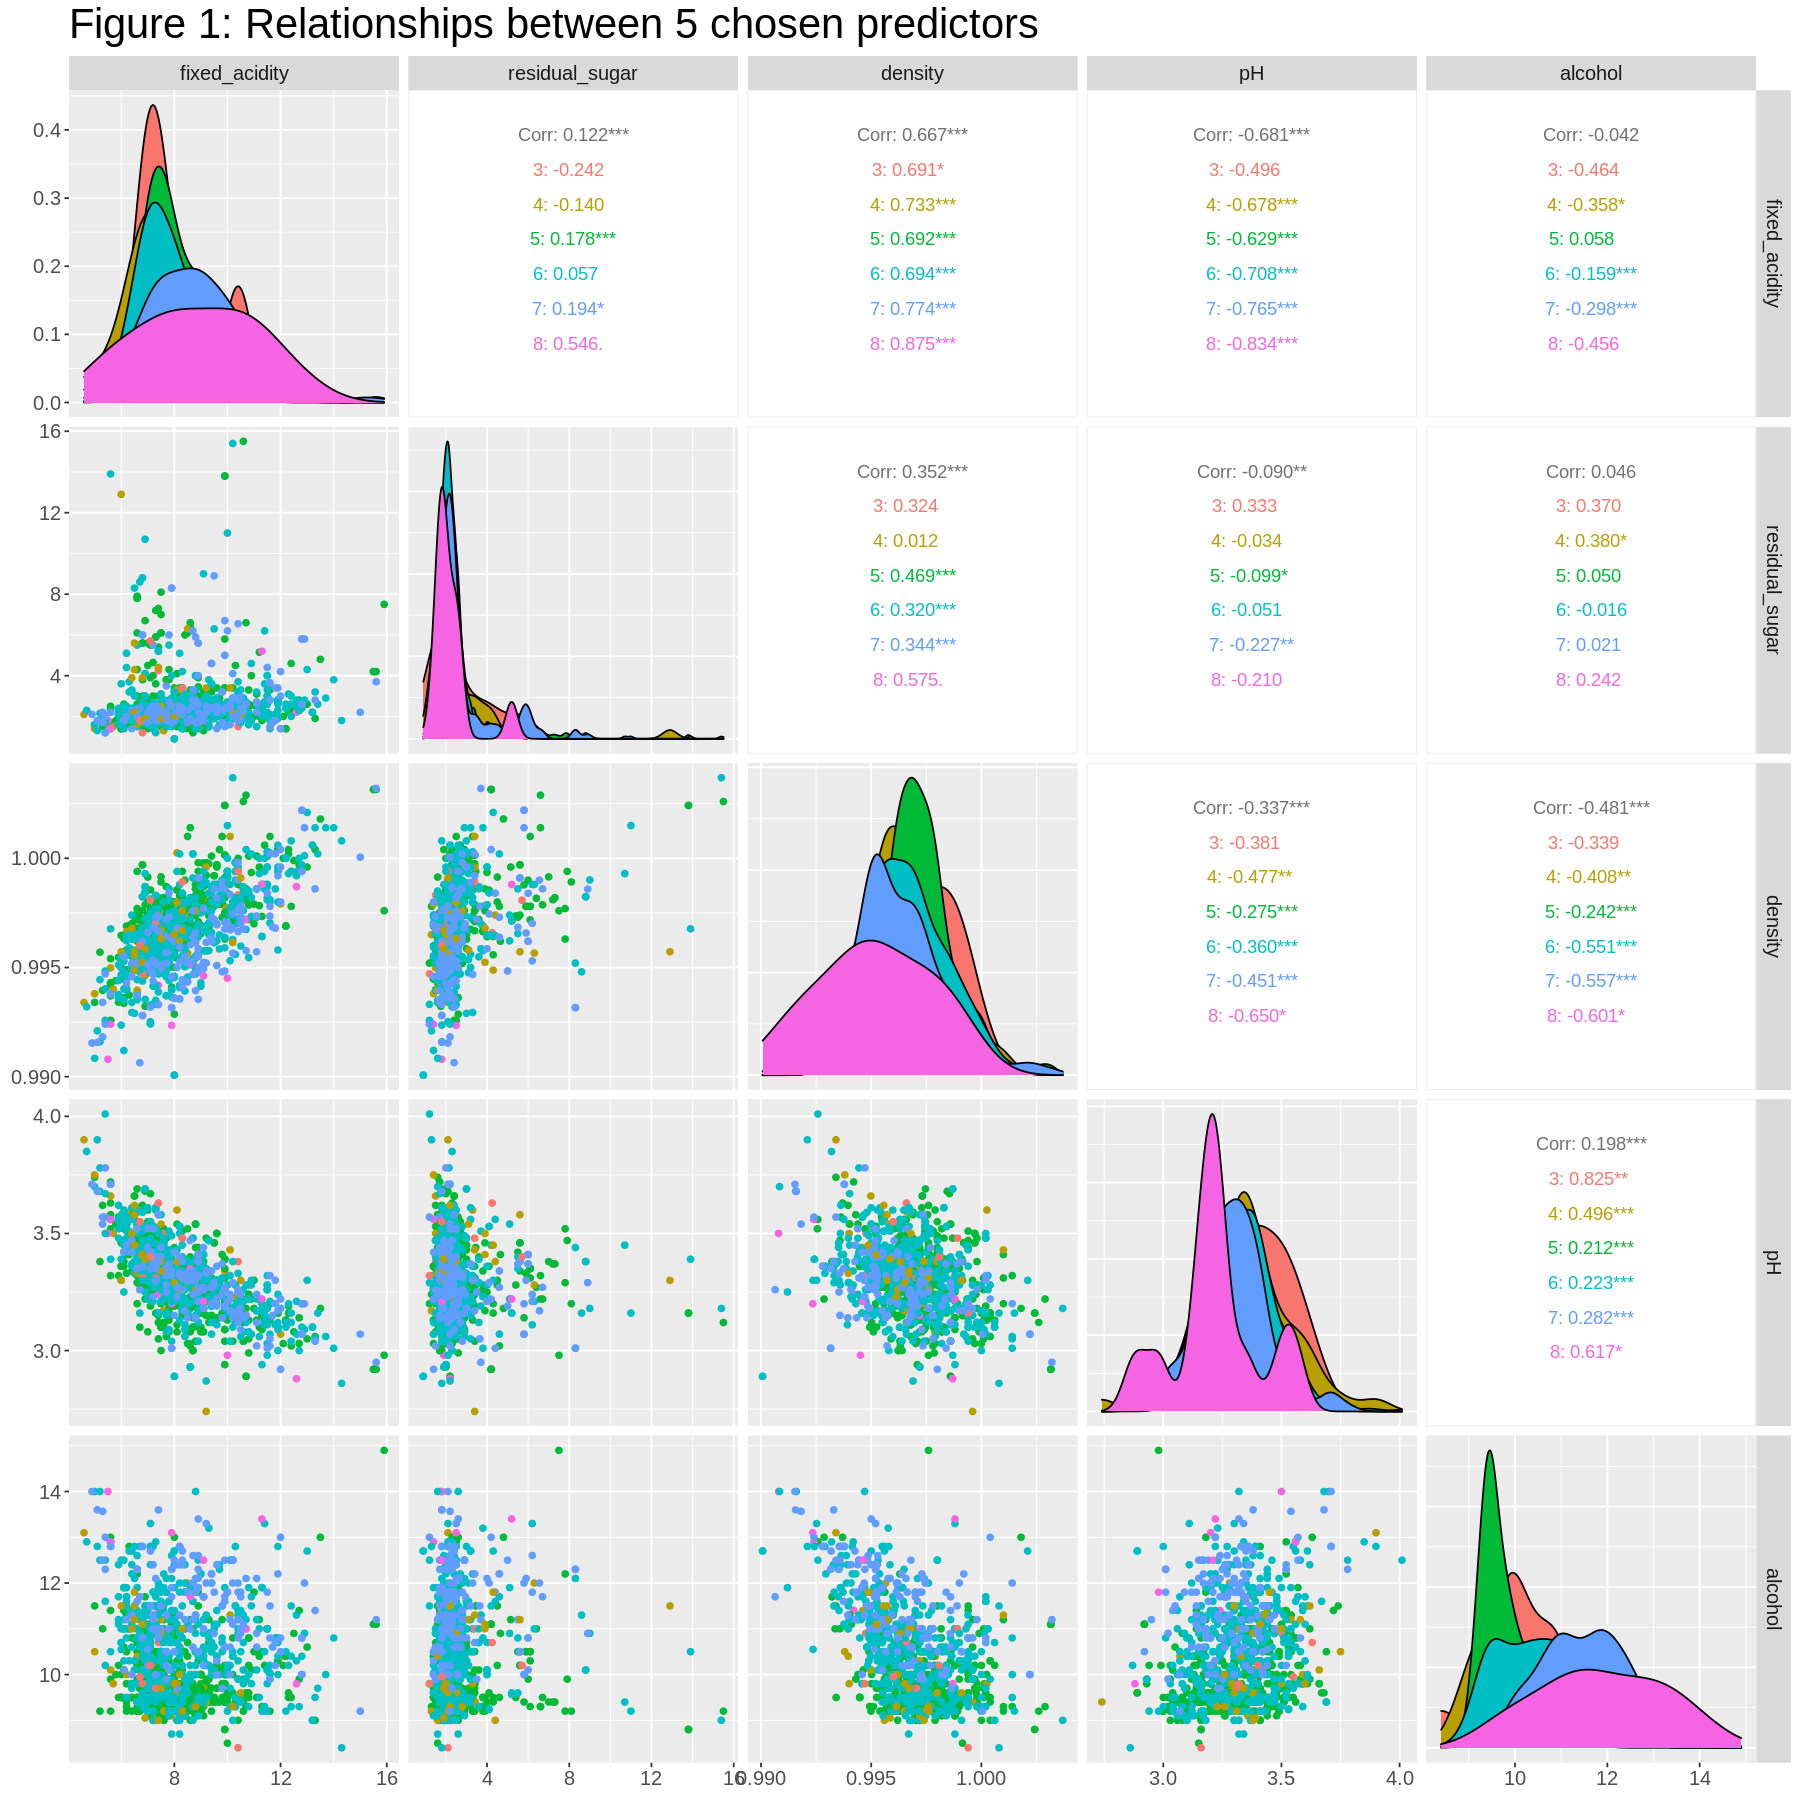

In [21]:
# creating pair plot from redwine_training_data with columns selected appropriately and colour set as our factor (quality) 
options(repr.plot.width = 15, repr.plot.height = 15) 
redwine_plot <- ggpairs(redwine_train, columns = 1:5, aes(colour=quality)) +
    ggtitle("Figure 1: Relationships between 5 chosen predictors") +
    theme(plot.title = element_text(size = 25), text = element_text(size = 15)) 

# displaying plot
redwine_plot

The pairplot above is separated into 3 sections. 

Everything is colored to represent our factor of quality, as follows: 
* Orange: Quality = 3
* Yellow: Quality = 4
* Green: Quality = 5
* Light Blue: Quality = 6
* Dark Blue: Quality = 7
* Magenta: Quality = 8

The plots in the bottom left show a scatterplot comparison between every combination of our 5 predictors. This is an easy way for us to visualize which combinations of predictors show correlations, all at the same time.

The lists of values in the top right show the Pearson correlation value for every combination of our 5 predictors. This value is a number from -1 (negative, linear) to 1 (positive, linear), representing the strength of a linear correlation, where -1 and 1 are strongest and 0 is weakest. Due to the low linearity, we will be using a K-NN model for our classification, as opposed to a linear model.

The distributions on the middle diagonal show the correlation value for each individual predictor at each value of quality. For example, in the distribution in the very bottom right, green (quality = 5) has a very high correlation with alcohol when alcohol is around 9, and magenta's (quality = 8) highest correlation is when alcohol is around 12. This means that a prediction classifying an observation with alcohol level 9 as quality 5 would very likely be accurate. Furthermore, a prediction classifying an observation with alcohol level 12 as quality 8 would be significantly less accurate, while still being more accurate than a prediction classifying an observation with alcohol level 9 as quality 8.

## Data Analysis 
#### Creating K-NN classification model

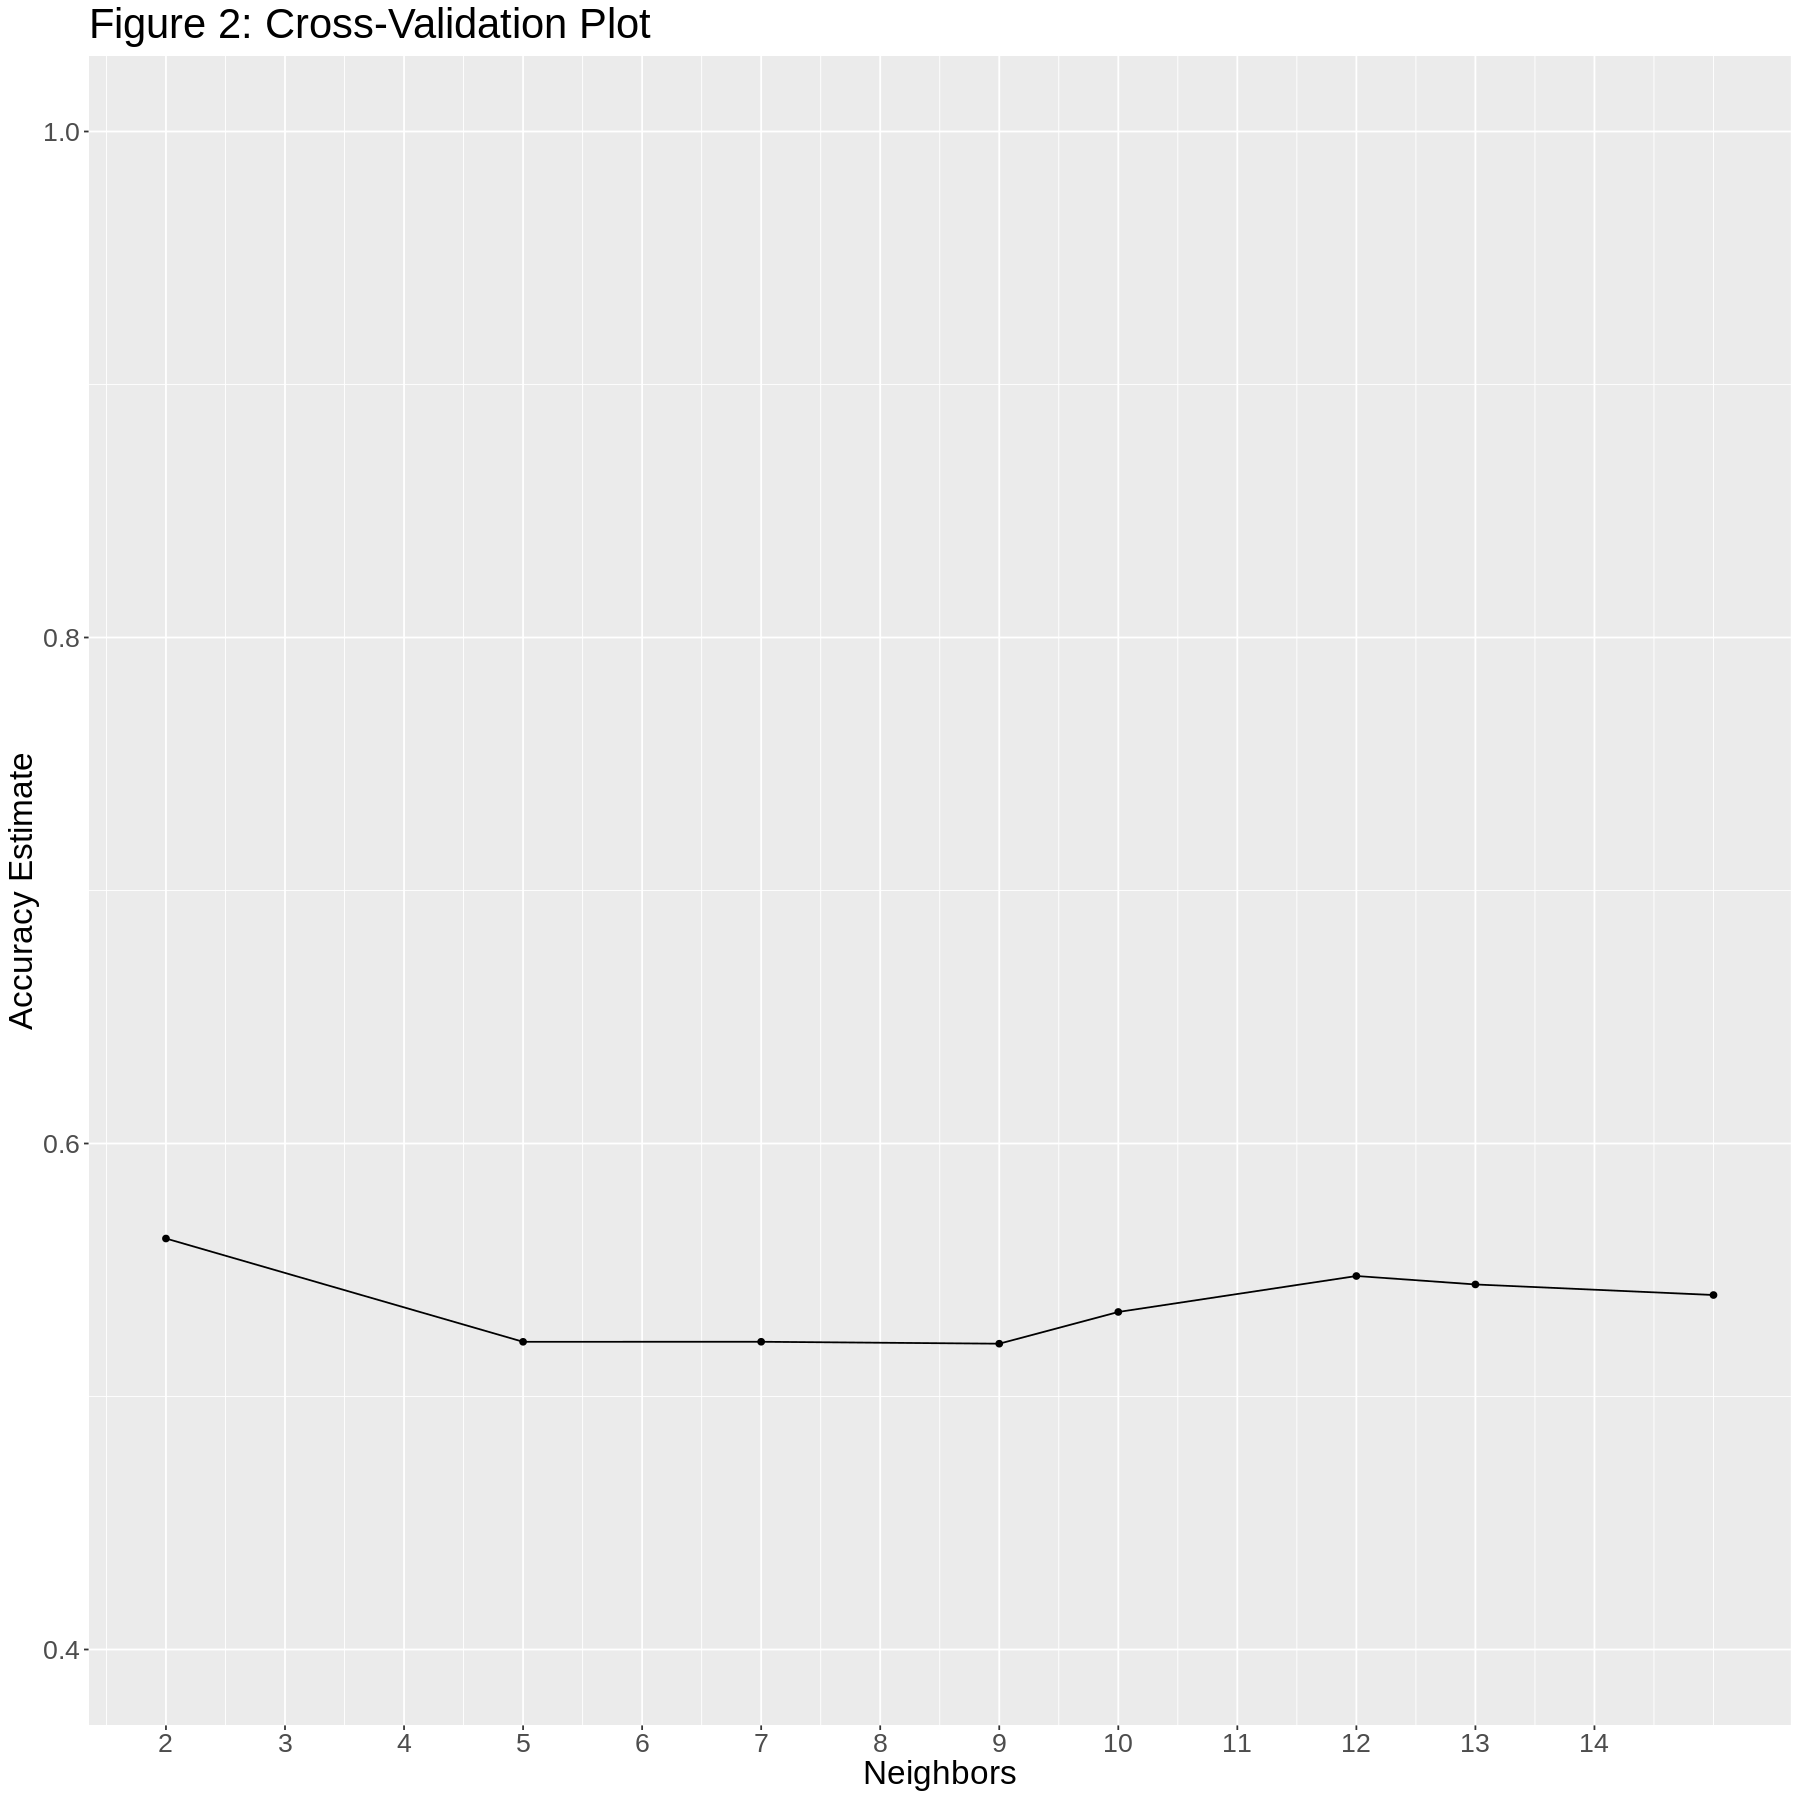

In [22]:
set.seed(1000)

# creating recipe where quality is predicted from our 5 predictors, with all predictors standardized
redwine_recipe <- recipe(quality ~., data = redwine_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# performing cross validation
redwine_vfold <- vfold_cv(redwine_train, v=5, strata = quality)

# determining best K value for model
redwine_knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# continued
redwine_knn_results <- workflow() |>
    add_recipe(redwine_recipe) |>
    add_model(redwine_knn_tune) |>
    tune_grid(resamples = redwine_vfold, grid = 10) |>
    collect_metrics()

# filtering by accuracy
redwine_accuracies <- redwine_knn_results |>
    filter(.metric=="accuracy")

# creating cross-validation plot with K values against their accuracies
cross_val_plot <- ggplot(redwine_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 2: Cross-Validation Plot") +
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +
    scale_y_continuous(limits = c(0.4, 1.0)) +
    theme(plot.title = element_text(size = 25), text = element_text(size = 20)) 

# displaying the cross-validation plot
cross_val_plot

Based on this plot, we chose to use 12 neighbors for our KNN classification, because it has a relatively high accuracy with small variation between adjacent values.  

In [7]:
set.seed(1000)

# creating knn model with chosen neighbour amount of 12
redwine_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
  set_engine("kknn") |>
  set_mode("classification")

# fitting model
redwine_fit <- workflow() |>
  add_recipe(redwine_recipe) |>
  add_model(redwine_knn) |>
  fit(data = redwine_train)

# getting the prediction column
redwine_predictions <- predict(redwine_fit, redwine_test) |> 
    bind_cols(redwine_test)

#### Applying K-NN classification model and determining accuracy

In [31]:
# comparing predictions to real values to determine accuracy of model
redwine_accuracy <- redwine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

# displaying accuracy
print("Table 4: Accuracy Results")
redwine_accuracy

[1] "Table 4: Accuracy Results"


.metric,.estimate
<chr>,<dbl>
accuracy,0.5835411


#### Creating confusion matrix 

In [32]:
# creating confusion matrix
redwine_cm <- redwine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)

# displaying confusion matrix
print("Table 5: Confusion Matrix")
redwine_cm

[1] "Table 5: Confusion Matrix"


          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   1   0   0   0
         5   1   5 130  63   2   0
         6   0   6  37  84  29   2
         7   0   0   3  14  20   4
         8   0   0   0   0   0   0

Since our accuracy metrics were unexpectedly low, we decided to attempt the classification again, but with all 11 predictors. There was no significant difference between the two, so we are continuing with the original 5 predictors.

Accuracy with initial 5 predictors, 12 neighbors:
* 58.35%

Accuracy with initial 5 predcitors, 2 neighbors: 
* 60.10%

Accuracy with all 11 predictors, 12 neighbors: 
* 58.10%

Accuracy with all 11 predictors, 2 neighbors: 
* 62.59%


#### Creating correlation plot

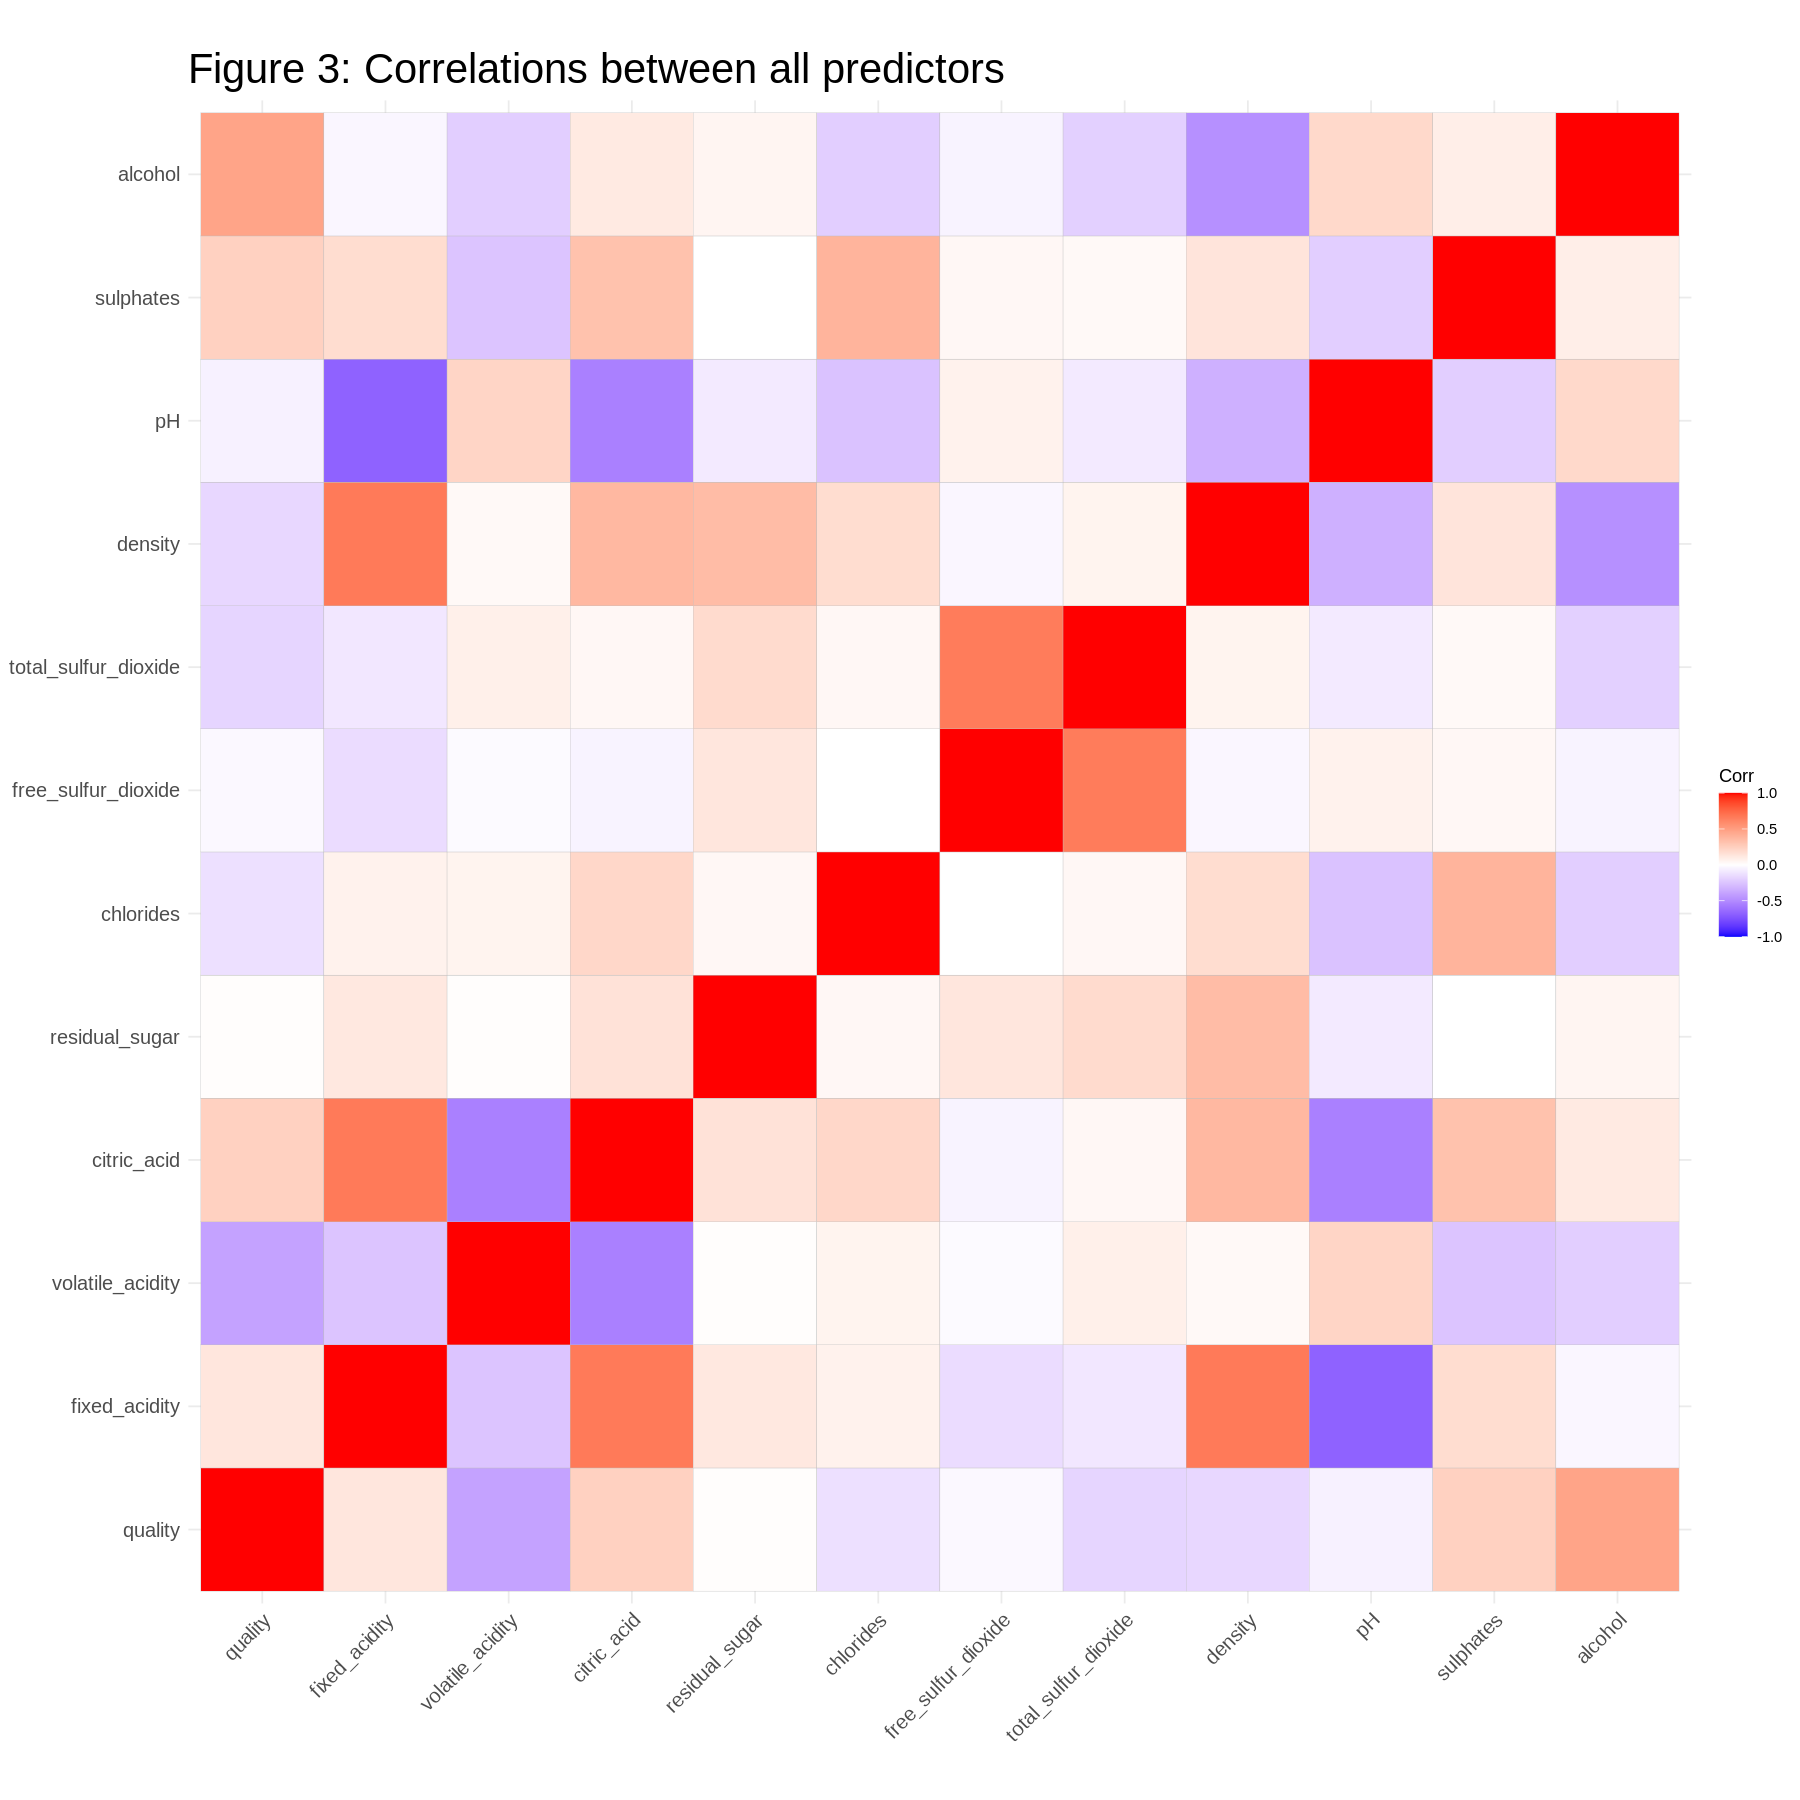

In [26]:
# changing quality from factor to numeric, putting it in first column
redwine_corrplot <- redwine_train_all |>
    mutate(quality = as.numeric(quality)) |>
    select(quality, everything())

# generating correlation plot to determine most important factors
ggcorrplot(cor(redwine_corrplot)) + 
    ggtitle("Figure 3: Correlations between all predictors") + 
    theme(plot.title = element_text(size = 25))


Since our low accuracy may indicate that many characteristics of a red wine are actually insignificant to its perceived quality, we created this correlation plot to see which factors impacted quality the most. This shows that alcohol and volatile acidity have the biggest impact on quality, citric acid, chlorides, total sulfur dioxide, density, and sulphates all have a moderate impact on quality, and fixed acidity, residual sugar, free sulfur dioxide, and pH all have a low impact on quality. Although our original five predictors were of decent importance, we repeated the classification with the five most significant factors, and there not a significant difference.

## Discussion

#### Summary of our findings

We found there to be an accuracy of around 60% when classifying wine quality using our predictors. While we were not able to find a perfect relationship between the properties of a wine and its quality, we found that there are still multiple factors that show a strong correlation. To identify which factors affect the wine quality the most, we created a correlation plot. This visualization indicated that alcohol has the most positive relationship with the wine quality and it is followed by citric acid, sulphates, and fixed acidity. However, volatile acidity has the most negative correlation and then chlorides, total sulphur dioxide, and density followed. 

#### Was this what we expected?

This was different from what we expected to find, as we were not able to find many predictors with a significant correlation towards wine quality. However, these predictors were able to show a casual relation between our predictors and wine quality. 

#### What impact could these findings have?

Our findings reinforce the idea that wine quality has an aspect of subjectivity and opinions can vary between individuals depending on personal preferences and regional factors (Jackson 2008).  While our accuracy is not particularly high, with the number of options available for classes of quality, it shows that there is still some value in using the characteristics of a wine to assess it objectively. 

#### What future questions could this lead to?

* Do the taste preferences and traits of wine quality testers affect the results of their quality assessments? 
* Are there any trends between a quality tester’s region and background and the way they interpret wine quality?
* How effective really is analyzing the properties of wine to determine wine quality, considering the differences in taste preferences?
* How can the taste preferences of wine tasters be evaluated empirically? 
* What other components of wine can be measured empirically to account for the variation in perceived wine quality?


## References

Cortez, P., Cerdeira, A., Almeida, F., Matos, T. & Reis, J.(2009). Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. https://archive.ics.uci.edu/ml/datasets/wine+quality

Cvrvv. (n.d.). About vinho verde. Vinho Verde. Retrieved from https://www.vinhoverde.pt/en/about-vinho-verde 

Jackson, Ronald S. (2008). In Food Science and Technology. Wine Science, 3:1-14,  Academic Press, https://doi.org/10.1016/B978-012373646-8.50004-4 

Nemzer, B., Kalita, D., Yashin, A. Y., & Yashin, Y. I. (2021). Chemical composition and polyphenolic compounds of red wines: Their antioxidant activities and effects on human health—a review. Beverages, 8(1), 1. https://doi.org/10.3390/beverages8010001 
